<a href="https://colab.research.google.com/github/swiatej/ds4/blob/main/Pyspark_Youtube_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code below installs pyspark on colab and starts session. 

In [ ]:
# Download Java Virtual Machine (JVM)
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# Download Spark
!wget -q https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
# Unzip the file
!tar xf spark-3.3.1-bin-hadoop3.tgz
# Set up the environment for Spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = '/content/spark-3.3.1-bin-hadoop3'
# Install library for finding Spark
!pip install -q findspark
# Import the libary
import findspark
# Initiate findspark
findspark.init()
# Check the location for Spark
findspark.find()
# Import SparkSession
import pyspark
from pyspark.sql import SparkSession
# Create a Spark Session
spark = SparkSession.builder.master("local[*]").getOrCreate()
# Check Spark Session Information
spark

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# The code below sets up our schema (data isn't cleaned yet!!)

In [ ]:
# Import Libraries
import pyspark
from pyspark.sql.types import StructType, StructField, FloatType, BooleanType, DateType
from pyspark.sql.types import DoubleType, IntegerType, StringType, TimestampType
from pyspark import SQLContext
# Setup the Configuration
sqlcontext = SQLContext(spark)
# Setup the Schema
schema = StructType([StructField("ID", IntegerType(),True),
StructField("video_ID", StringType(),True),
StructField("title", StringType(),True),
StructField("publishedAt", TimestampType(),True),
StructField("channelId", StringType(),True),
StructField("channelTitle", StringType(),True),
StructField("categoryId", StringType(),True),
StructField("trending_date", TimestampType(),True),
StructField("tags", StringType(),True),
StructField("view_count", IntegerType(),True),
StructField("likes", IntegerType(),True),
StructField("dislikes", IntegerType(),True),
StructField("comment_count", IntegerType(),True),
StructField("thumbnail_link", StringType(),True),
StructField("comments_disabled", BooleanType(),True),
StructField("ratings_disabled", BooleanType(),True),
StructField("description", StringType(),True),
])

# Setup the Data Frames
# Uk data
gb_data = spark.read.schema(schema).csv('GB_data_youtube.csv') # Iya
#gb_data = spark.read.schema(schema).csv('/content/drive/MyDrive/youtube analysis/GB_data_youtube.csv',header='true') # Julita
gb_data = gb_data.drop('thumbnail_link')
gb_data = gb_data.dropna()

# Canadian data
ca_data = spark.read.schema(schema).csv('CA_data_youtube.csv') # Iya
#ca_data = spark.read.schema(schema).csv('/content/drive/MyDrive/youtube analysis/CA_data_youtube.csv',header='true') # Julita
ca_data = ca_data.drop('thumbnail_link')
ca_data = ca_data.dropna()

# US data
us_data = spark.read.schema(schema).csv('US_data_youtube.csv') # Iya
#us_data = spark.read.schema(schema).csv('/content/drive/MyDrive/youtube analysis/US_data_youtube.csv',header='true') # Julita
us_data = us_data.drop('thumbnail_link')
us_data = us_data.dropna()

In [ ]:
ca_data.show()

+---+-----------+--------------------+-------------------+--------------------+--------------------+----------+-------------------+--------------------+----------+------+--------+-------------+-----------------+----------------+--------------------+
| ID|   video_ID|               title|        publishedAt|           channelId|        channelTitle|categoryId|      trending_date|                tags|view_count| likes|dislikes|comment_count|comments_disabled|ratings_disabled|         description|
+---+-----------+--------------------+-------------------+--------------------+--------------------+----------+-------------------+--------------------+----------+------+--------+-------------+-----------------+----------------+--------------------+
|  0|KX06ksuS6Xo|Diljit Dosanjh: C...|2020-08-11 07:30:02|UCZRdNleCgW-BGUJf...|      Diljit Dosanjh|        10|2020-08-12 00:00:00|clash diljit dosa...|   9140911|296541|    6180|        30059|            false|           false|CLASH official mu...|


# **EDA**

In [ ]:
# Canada data analysis
ca_data.describe().show() # similar to pandas .describe()
# Straight away we can see such challenge as emojis (how to properly encode them?)

+-------+------------------+-----------+--------------------+--------------------+-------------+------------------+----------------------+-----------------+------------------+-----------------+------------------+--------------------+
|summary|                ID|   video_ID|               title|           channelId| channelTitle|        categoryId|                  tags|       view_count|             likes|         dislikes|     comment_count|         description|
+-------+------------------+-----------+--------------------+--------------------+-------------+------------------+----------------------+-----------------+------------------+-----------------+------------------+--------------------+
|  count|              9444|       9444|                9444|                9444|         9444|              9444|                  9444|             9444|              9444|             9444|              9444|                9444|
|   mean| 4751.606628547226|       null|                null|   

In [ ]:
# Great Britain data analysis
gb_data.describe().show()
# Has more videos than Canada
# Maximum title is the same as Canadian 

+-------+-----------------+-----------+--------------------+--------------------+-----------------+------------------+----------------------+------------------+------------------+------------------+------------------+--------------------+
|summary|               ID|   video_ID|               title|           channelId|     channelTitle|        categoryId|                  tags|        view_count|             likes|          dislikes|     comment_count|         description|
+-------+-----------------+-----------+--------------------+--------------------+-----------------+------------------+----------------------+------------------+------------------+------------------+------------------+--------------------+
|  count|            14649|      14649|               14649|               14649|            14649|             14649|                 14649|             14649|             14649|             14649|             14649|               14649|
|   mean|7395.424738890027|       null|     

In [ ]:
# United States data analysis
us_data.describe().show()
# Has the least amount of videos 

+-------+-----------------+-----------+--------------------+--------------------+-------------+------------------+---------------------------+------------------+------------------+------------------+------------------+--------------------+
|summary|               ID|   video_ID|               title|           channelId| channelTitle|        categoryId|                       tags|        view_count|             likes|          dislikes|     comment_count|         description|
+-------+-----------------+-----------+--------------------+--------------------+-------------+------------------+---------------------------+------------------+------------------+------------------+------------------+--------------------+
|  count|             7482|       7482|                7482|                7482|         7482|              7482|                       7482|              7482|              7482|              7482|              7482|                7482|
|   mean|3766.523389468057|       null| 

In [ ]:
gb_data.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- video_ID: string (nullable = true)
 |-- title: string (nullable = true)
 |-- publishedAt: timestamp (nullable = true)
 |-- channelId: string (nullable = true)
 |-- channelTitle: string (nullable = true)
 |-- categoryId: string (nullable = true)
 |-- trending_date: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- view_count: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- comments_disabled: boolean (nullable = true)
 |-- ratings_disabled: boolean (nullable = true)
 |-- description: string (nullable = true)



In [ ]:
gb_data.columns

['ID',
 'video_ID',
 'title',
 'publishedAt',
 'channelId',
 'channelTitle',
 'categoryId',
 'trending_date',
 'tags',
 'view_count',
 'likes',
 'dislikes',
 'comment_count',
 'comments_disabled',
 'ratings_disabled',
 'description']

In [ ]:
print("summary on title in GB data \n", gb_data.describe('title').show())
print('Number of unique titles in GB data \n', gb_data.select('title').distinct().count())
print("summary on channels in GB data \n", gb_data.describe('ChannelTitle').show())
print('Number of unique channels in GB data \n', gb_data.select('ChannelTitle').distinct().count())

+-------+--------------------+
|summary|               title|
+-------+--------------------+
|  count|               14649|
|   mean|                null|
| stddev|                null|
|    min|#89 Khabib Nurmag...|
|    max|🤯2-8! Bayern Cru...|
+-------+--------------------+

summary on title in GB data 
 None
Number of unique titles in GB data 
 3409
+-------+-----------------+
|summary|     ChannelTitle|
+-------+-----------------+
|  count|            14649|
|   mean|             null|
| stddev|             null|
|    min|10 Downing Street|
|    max|   채널 NCT DANCE|
+-------+-----------------+

summary on channels in GB data 
 None
Number of unique channels in GB data 
 1567


In [ ]:
# sorting dataframe by likes 
gb_data.orderBy('likes').show(10)
# Another challenge Non english letters in names 

+-----+-----------+------------------------+-------------------+--------------------+-----------------------------+----------+-------------------+-----------------------------+----------+-----+--------+-------------+-----------------+----------------+-------------------------+
|   ID|   video_ID|                   title|        publishedAt|           channelId|                 channelTitle|categoryId|      trending_date|                         tags|view_count|likes|dislikes|comment_count|comments_disabled|ratings_disabled|              description|
+-----+-----------+------------------------+-------------------+--------------------+-----------------------------+----------+-------------------+-----------------------------+----------+-----+--------+-------------+-----------------+----------------+-------------------------+
|10125|fH-14f7CLnA|    SHUT DOWN PROVO C...|2020-09-28 17:28:53|UCwl5c3q0uBK3mVv9...|                 Paris Hilton|        24|2020-10-01 00:00:00|                    

In [ ]:
# The most popular channels in all countries 
from pyspark.sql.functions import desc
# The most popular channels in GB
print('The most popular channels in GB:')
num_Got_Viral_Each_Channel_GB = gb_data.groupBy("ChannelTitle").count()
num_Got_Viral_Each_Channel_GB.orderBy(desc('count')).show(5)
# The most popular channels in CA
print('The most popular channels in CANADA:')
num_Got_Viral_Each_Channel_CA = ca_data.groupBy("ChannelTitle").count()
num_Got_Viral_Each_Channel_CA.orderBy(desc('count')).show(5)
# The most popular channels in the US
print('The most popular channels in the US:')
num_Got_Viral_Each_Channel_US = us_data.groupBy("ChannelTitle").count()
num_Got_Viral_Each_Channel_US.orderBy(desc('count')).show(5)
# From the output it can be seen that Canada and US have a lot of popular channels in total 

The most popular channels in GB:
+--------------------+-----+
|        ChannelTitle|count|
+--------------------+-----+
|    The United Stand|  199|
|                 WWE|  172|
| Sky Sports Football|  147|
|            BT Sport|  125|
|Jay's Virtual Pub...|   92|
+--------------------+-----+
only showing top 5 rows

The most popular channels in CANADA:
+--------------+-----+
|  ChannelTitle|count|
+--------------+-----+
|           NBA|  121|
|           NHL|   53|
|          ESPN|   48|
|           XXL|   47|
|MrBeast Gaming|   47|
+--------------+-----+
only showing top 5 rows

The most popular channels in the US:
+--------------+-----+
|  ChannelTitle|count|
+--------------+-----+
|           NBA|   86|
|           XXL|   56|
|MrBeast Gaming|   50|
| James Charles|   47|
|          ESPN|   46|
+--------------+-----+
only showing top 5 rows



In [ ]:
# Are there any videos that got viral in all countries
#create new dataFrame from "City" and "Total" columns
title_likes_GB = gb_data.select(gb_data['Title'], gb_data['Likes'], gb_data['Video_ID'])
# if the video got viral multiple times ???
print('GB')
print(title_likes_GB.orderBy(desc('Likes')).show(5))
# US
print('US')
title_likes_US = us_data.select(us_data['Title'], us_data['Likes'], us_data['Video_ID'])
print(title_likes_US.orderBy(desc('Likes')).show(5))
# CANADA
print('Canada')
title_likes_US = ca_data.select(ca_data['Title'], ca_data['Likes'], ca_data['Video_ID'])
print(title_likes_US.orderBy(desc('Likes')).show(5))
# Are there fans of only one video of BTS ????
# I guess this video was in the top for a couple weeks in all countries

GB
+-------------------------+--------+-----------+
|                    Title|   Likes|   Video_ID|
+-------------------------+--------+-----------+
|BTS (방탄소년단) 'Dyna...|15246514|gdZLi9oWNZg|
|BTS (방탄소년단) 'Dyna...|14994044|gdZLi9oWNZg|
|BTS (방탄소년단) 'Dyna...|14678091|gdZLi9oWNZg|
|BTS (방탄소년단) 'Dyna...|14134505|gdZLi9oWNZg|
|     BLACKPINK - 'Ice ...|11645396|vRXZj0DzXIA|
+-------------------------+--------+-----------+
only showing top 5 rows

None
US
+-------------------------+--------+-----------+
|                    Title|   Likes|   Video_ID|
+-------------------------+--------+-----------+
|BTS (방탄소년단) 'Dyna...|15735533|gdZLi9oWNZg|
|BTS (방탄소년단) 'Dyna...|15460822|gdZLi9oWNZg|
|BTS (방탄소년단) 'Dyna...|15246496|gdZLi9oWNZg|
|BTS (방탄소년단) 'Dyna...|14994034|gdZLi9oWNZg|
|BTS (방탄소년단) 'Dyna...|14678048|gdZLi9oWNZg|
+-------------------------+--------+-----------+
only showing top 5 rows

None
Canada
+-------------------------+--------+-----------+
|                    Title|   Likes|   Vi

In [ ]:
# If one video was in top chart for multiple weeks we need to combine all the likes to leave only unique video_ids
# US top unique viral videos
only_unique_videos_us = us_data.groupBy("Video_ID").sum('Likes')
only_unique_videos_us.orderBy(desc('sum(Likes)')).show(5)
# GB top unique viral videos
print('GB top unique viral videos')
only_unique_videos_gb = gb_data.groupBy("Video_ID").sum('Likes')
only_unique_videos_gb.orderBy(desc('sum(Likes)')).show(5)
# Canada top unique viral videos
print('Canada top unique viral videos')
only_unique_videos_ca = ca_data.groupBy("Video_ID").sum('Likes')
only_unique_videos_ca.orderBy(desc('sum(Likes)')).show(5)
# Common viral video ids
# gdZLi9oWNZg BV2FdDmGiW0 - all 3 countries 
# CN4fffh7gmk vRXZj0DzXIA - US & Canada
# Finding the title based on Video ID
all_1 = us_data.filter(us_data.video_ID == 'BV2FdDmGiW0')
all_2 = us_data.filter(us_data.video_ID == 'gdZLi9oWNZg')
print('The most Viral Videos in all 3 countries are :')
print(all_1.select('title').distinct().collect(), ' ', all_2.select('title').distinct().collect())
# It hnestly seems like the same thing to me. There is just a small thing in the title
print('Common Viral Videos in US and Canada :')
ca_us_1 = us_data.filter(us_data.video_ID == 'vRXZj0DzXIA')
ca_us_2 = us_data.filter(us_data.video_ID == 'CN4fffh7gmk')
print(ca_us_1.select('title').distinct().collect(), ' ', ca_us_2.select('title').distinct().collect())


+-----------+----------+
|   Video_ID|sum(Likes)|
+-----------+----------+
|gdZLi9oWNZg| 107183079|
|vRXZj0DzXIA|  91799816|
|oxoWhyS9buA|  33971814|
|BV2FdDmGiW0|  33136176|
|CN4fffh7gmk|  19082734|
+-----------+----------+
only showing top 5 rows

GB top unique viral videos
+-----------+----------+
|   Video_ID|sum(Likes)|
+-----------+----------+
|vRXZj0DzXIA|  80004347|
|gdZLi9oWNZg|  75987033|
|dyRsYk0LyA8|  45529801|
|BV2FdDmGiW0|  38770660|
|oxoWhyS9buA|  34042982|
+-----------+----------+
only showing top 5 rows

Canada top unique viral videos
+-----------+----------+
|   Video_ID|sum(Likes)|
+-----------+----------+
|gdZLi9oWNZg| 107184216|
|vRXZj0DzXIA|  91800666|
|oxoWhyS9buA|  33972036|
|BV2FdDmGiW0|  27185050|
|CN4fffh7gmk|  16085199|
+-----------+----------+
only showing top 5 rows

The most Viral Videos in all 3 countries are :
[Row(title="BTS (방탄소년단) 'Dynamite' Official MV (B-side)")]   [Row(title="BTS (방탄소년단) 'Dynamite' Official MV")]
Common Viral Videos in US and Cana

In [ ]:
# Looking into the most popular categories by counting the number of how many times this categoy got viral
# The most popular categories in GB
print('The most popular categories in GB:')
populat_cat_gb = gb_data.groupBy("categoryID").count()
populat_cat_gb.orderBy(desc('count')).show(5)
# Note: category id is the same for each country
# 17 - "Sports"
# 24 - "Entertainment"
# 20 - "Gaming"
# 10 - "Music" (ofc BTS ...)
# 22 - "People & Blogs"
# 23 - "Comedy"
# The most popular categories in CA
print('The most popular categories in Canada:')
populat_cat_ca = ca_data.groupBy("categoryID").count()
populat_cat_ca.orderBy(desc('count')).show(5)
# The most popular categories in the US
print('The most popular categories in US:')
populat_cat_us = us_data.groupBy("categoryID").count()
populat_cat_us.orderBy(desc('count')).show(5)
# GB and US have all the same!
# They all are pretty much the same, only Canada has Comedy instead of Gaming

The most popular categories in GB:
+----------+-----+
|categoryID|count|
+----------+-----+
|        24| 3243|
|        17| 2973|
|        10| 2527|
|        22| 1137|
|        20| 1094|
+----------+-----+
only showing top 5 rows

The most popular categories in Canada:
+----------+-----+
|categoryID|count|
+----------+-----+
|        24| 1922|
|        10| 1605|
|        17| 1345|
|        22|  820|
|        23|  680|
+----------+-----+
only showing top 5 rows

The most popular categories in US:
+----------+-----+
|categoryID|count|
+----------+-----+
|        10| 1677|
|        24| 1440|
|        17|  849|
|        22|  679|
|        20|  606|
+----------+-----+
only showing top 5 rows



In [ ]:
# The average amount of likes across all countries
print('AVG number of likes in GB : ', gb_data.groupBy().avg("Likes").take(1)[0][0])
print('AVG number of likes in the US : ', us_data.groupBy().avg("Likes").take(1)[0][0])
print('AVG number of likes in CANADA : ', ca_data.groupBy().avg("Likes").take(1)[0][0])
# Interesting that GB has the biggest number count of videos and the smallest average of likes

AVG number of likes in GB :  128424.24363437777
AVG number of likes in the US :  168425.54370489175
AVG number of likes in CANADA :  159918.69567979668


In [ ]:
# Checking and Dropping Duplicated rows
#count the number of original data rows
n1 = gb_data.count()
print("number of original data rows: ", n1)
#count the number of data rows after deleting duplicated data
n2 = gb_data.dropDuplicates().count()
print("number of data rows after deleting duplicated data: ", n2)
n3 = n1 - n2
print("number of duplicate rows in GB: ", n3)

n1 = us_data.count()
print("number of original data rows: ", n1)
#count the number of data rows after deleting duplicated data
n2 = us_data.dropDuplicates().count()
print("number of data rows after deleting duplicated data: ", n2)
n3 = n1 - n2
print("number of duplicate rows in US: ", n3)
n1 = ca_data.count()
print("number of original data rows: ", n1)
#count the number of data rows after deleting duplicated data
n2 = ca_data.dropDuplicates().count()
print("number of data rows after deleting duplicated data: ", n2)
n3 = n1 - n2
print("number of duplicate rows in Canada: ", n3)
# No Duplicates in any of the datasets

number of original data rows:  14649
number of data rows after deleting duplicated data:  14649
number of duplicate rows in GB:  0
number of original data rows:  7482
number of data rows after deleting duplicated data:  7482
number of duplicate rows in US:  0
number of original data rows:  9444
number of data rows after deleting duplicated data:  9444
number of duplicate rows in Canada:  0


# **NLP & Feature Engineering**

In [ ]:
# I want to use SpayCy for NLP 
# It should be working with Spark as well
# There is also a tool called Spark NLP  https://nlp.johnsnowlabs.com
!wget http://setup.johnsnowlabs.com/colab.sh -O - | bash

--2022-12-18 12:22:27--  http://setup.johnsnowlabs.com/colab.sh
Resolving setup.johnsnowlabs.com (setup.johnsnowlabs.com)... 51.158.130.125
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://setup.johnsnowlabs.com/colab.sh [following]
--2022-12-18 12:22:28--  https://setup.johnsnowlabs.com/colab.sh
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh [following]
--2022-12-18 12:22:28--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:44

In [ ]:
import sparknlp
from sparknlp.pretrained import PretrainedPipeline 
spark = sparknlp.start() # need to restart run time to be able to use sparknlp
# params =>> gpu=False
print("Spark NLP version", sparknlp.version())
print("Apache Spark version:", spark.version)

spark

In [ ]:
# Import Libraries
import pyspark
from pyspark.sql.types import StructType, StructField, FloatType, BooleanType, DateType
from pyspark.sql.types import DoubleType, IntegerType, StringType, TimestampType
from pyspark.sql.functions import col
from pyspark.sql import functions as F
from pyspark.sql.functions import date_format
from pyspark import SQLContext
# Setup the Configuration
sqlcontext = SQLContext(spark)
# Setup the Schema
schema = StructType([StructField("ID", IntegerType(),True),
StructField("video_ID", StringType(),True),
StructField("title", StringType(),True),
StructField("publishedAt", TimestampType(),True),
StructField("channelId", StringType(),True),
StructField("channelTitle", StringType(),True),
StructField("categoryId", StringType(),True),
StructField("trending_date", TimestampType(),True),
StructField("tags", StringType(),True),
StructField("view_count", IntegerType(),True),
StructField("likes", IntegerType(),True),
StructField("dislikes", IntegerType(),True),
StructField("comment_count", IntegerType(),True),
StructField("thumbnail_link", StringType(),True),
StructField("comments_disabled", BooleanType(),True),
StructField("ratings_disabled", BooleanType(),True),
StructField("description", StringType(),True),
])

# Setup the Data Frames
# Uk data
gb_data = spark.read.schema(schema).csv('GB_data_youtube.csv')
#gb_data = spark.read.schema(schema).csv('/content/drive/MyDrive/youtube analysis/GB_data_youtube.csv',header='true') # Julita
gb_data = gb_data.drop('thumbnail_link')
gb_data = gb_data.dropna()

# Canadian data
ca_data = spark.read.schema(schema).csv('CA_data_youtube.csv')
#ca_data = spark.read.schema(schema).csv('/content/drive/MyDrive/youtube analysis/CA_data_youtube.csv',header='true') # Julita
ca_data = ca_data.drop('thumbnail_link')
ca_data = ca_data.dropna()

# US data
us_data = spark.read.schema(schema).csv('US_data_youtube.csv')
#us_data = spark.read.schema(schema).csv('/content/drive/MyDrive/youtube analysis/US_data_youtube.csv',header='true') # Julita
us_data = us_data.drop('thumbnail_link')
us_data = us_data.dropna()

/usr/local/lib/python3.8/dist-packages/pyspark/sql/context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
# @title Time data Analysis. Feature Engineering

# # # GB 

# Getting Quart data
from pyspark.sql.functions import quarter 
gb_data = gb_data.withColumn('quart',quarter(gb_data.publishedAt))
gb_data = gb_data.withColumn("quart",col("quart").cast("int"))
# Getting day of the week feature 
gb_data = gb_data.withColumn("day_of_the_week", date_format('publishedAt', 'EEEE'))
# Need to encode day of the week into numerical attribute
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="day_of_the_week", outputCol="weekday")
gb_data = indexer.fit(gb_data).transform(gb_data)

# # # CA

ca_data = ca_data.withColumn('quart',quarter(ca_data.publishedAt))
ca_data = ca_data.withColumn("quart",col("quart").cast("int"))
# Getting day of the week feature 
ca_data = ca_data.withColumn("day_of_the_week", date_format('publishedAt', 'EEEE'))
# Need to encode day of the week into numerical attribute
indexer = StringIndexer(inputCol="day_of_the_week", outputCol="weekday")
ca_data = indexer.fit(ca_data).transform(ca_data)

# # # USA

us_data = us_data.withColumn('quart',quarter(us_data.publishedAt))
us_data = us_data.withColumn("quart",col("quart").cast("int"))
# Getting day of the week feature 
us_data = us_data.withColumn("day_of_the_week", date_format('publishedAt', 'EEEE'))
# Need to encode day of the week into numerical attribute
indexer = StringIndexer(inputCol="day_of_the_week", outputCol="weekday")
us_data = indexer.fit(us_data).transform(us_data)

In [ ]:
gb_data.show()

+---+-----------+--------------------+-------------------+--------------------+-------------------+----------+-------------------+--------------------+----------+------+--------+-------------+-----------------+----------------+--------------------+-----+---------------+-------+
| ID|   video_ID|               title|        publishedAt|           channelId|       channelTitle|categoryId|      trending_date|                tags|view_count| likes|dislikes|comment_count|comments_disabled|ratings_disabled|         description|quart|day_of_the_week|weekday|
+---+-----------+--------------------+-------------------+--------------------+-------------------+----------+-------------------+--------------------+----------+------+--------+-------------+-----------------+----------------+--------------------+-----+---------------+-------+
|  0|J78aPJ3VyNs|I left youtube fo...|2020-08-11 16:34:06|UCYzPXprvl5Y-Sf0g...|      jacksepticeye|        24|2020-08-12 00:00:00|jacksepticeye|fun...|   2038853|3

### Analysis for GB data

In [ ]:
# Analysing popular categories for each Quart (season). Any patterns?
gb_data.groupBy(["categoryId", 'quart']).count().sort(col("count").desc()).show()

+----------+-----+-----+
|categoryId|quart|count|
+----------+-----+-----+
|        17|    3| 2278|
|        24|    3| 2244|
|        10|    3| 1756|
|        24|    4|  999|
|        20|    3|  802|
|        22|    3|  777|
|        10|    4|  771|
|        17|    4|  695|
|        23|    3|  564|
|        28|    3|  501|
|        26|    3|  409|
|        22|    4|  360|
|         1|    3|  296|
|        20|    4|  292|
|        25|    3|  283|
|        28|    4|  269|
|        27|    3|  254|
|         2|    3|  230|
|        23|    4|  226|
|        26|    4|  109|
+----------+-----+-----+
only showing top 20 rows



We can see more seasonality here. Category 1 - Film and Animation - only trends in quarter 3 - perhaps movie trailers are released primarily in quarter 3?
Category 2 - Autos & Vehicles - also trends only in quarter 3. Overall, we can see more videos trend in quarters 3 and 4 over all other quarters.

In [ ]:
# Analysing pupolar categories for each day of the week. Any patterns?
gb_data.groupBy(["categoryId", 'day_of_the_week']).count().sort(col("count").desc()).show()

+----------+---------------+-----+
|categoryId|day_of_the_week|count|
+----------+---------------+-----+
|        10|         Friday|  660|
|        17|         Sunday|  640|
|        24|         Monday|  551|
|        24|       Saturday|  551|
|        24|         Sunday|  539|
|        17|       Saturday|  524|
|        17|        Tuesday|  516|
|        10|       Thursday|  513|
|        24|        Tuesday|  509|
|        17|         Monday|  462|
|        24|      Wednesday|  391|
|        17|      Wednesday|  380|
|        10|        Tuesday|  377|
|        10|      Wednesday|  366|
|        24|       Thursday|  361|
|        10|         Monday|  343|
|        24|         Friday|  341|
|        17|         Friday|  255|
|        20|        Tuesday|  244|
|        22|        Tuesday|  235|
+----------+---------------+-----+
only showing top 20 rows



In [ ]:
# How many videos trending for each day of the week?
gb_data.groupBy('day_of_the_week').count().sort(col("count").desc()).show()

+---------------+-----+
|day_of_the_week|count|
+---------------+-----+
|        Tuesday| 2623|
|         Monday| 2338|
|      Wednesday| 2208|
|         Sunday| 2108|
|       Thursday| 1807|
|       Saturday| 1799|
|         Friday| 1766|
+---------------+-----+



It is interesting that for GB specifically, it seems most videos go trending if they have been released during the week - even early in the week (Mon, Tue, Wed). This is contrary to our assumption that if a video is released closer to the weekend, it is more likely to go viral.

### Analysis for CA data

In [ ]:
# Analysing popular categories for each Quart (season). Any patterns?
ca_data.groupBy(["categoryId", 'quart']).count().sort(col("count").desc()).show()

+----------+-----+-----+
|categoryId|quart|count|
+----------+-----+-----+
|        24|    4| 9712|
|        24|    3| 9493|
|        20|    3| 8802|
|        20|    2| 8614|
|        20|    4| 8214|
|        24|    2| 8175|
|        24|    1| 7087|
|        20|    1| 6922|
|        10|    3| 6567|
|        10|    4| 6308|
|        17|    3| 5917|
|        17|    4| 5094|
|        10|    2| 4616|
|        17|    2| 4318|
|        22|    3| 4079|
|        10|    1| 3991|
|        17|    1| 3948|
|        22|    4| 3946|
|        23|    4| 3249|
|        22|    2| 3123|
+----------+-----+-----+
only showing top 20 rows



In [ ]:
# How many videos overall in each quarter?
ca_data.groupBy(['quart']).count().sort(col("count").desc()).show()

+-----+-----+
|quart|count|
+-----+-----+
|    3|46767|
|    4|46393|
|    2|37779|
|    1|34224|
+-----+-----+



In [ ]:
# Analysing pupolar categories for each day of the week. Any patterns?
ca_data.groupBy(["categoryId", 'day_of_the_week']).count().sort(col("count").desc()).show()

+----------+---------------+-----+
|categoryId|day_of_the_week|count|
+----------+---------------+-----+
|        10|         Friday| 7157|
|        24|         Monday| 5599|
|        20|       Saturday| 5517|
|        24|         Sunday| 5496|
|        20|        Tuesday| 5228|
|        24|        Tuesday| 5001|
|        24|       Saturday| 4985|
|        17|         Sunday| 4956|
|        24|      Wednesday| 4915|
|        20|         Sunday| 4815|
|        20|      Wednesday| 4545|
|        20|         Monday| 4389|
|        24|         Friday| 4356|
|        20|       Thursday| 4300|
|        24|       Thursday| 4115|
|        20|         Friday| 3758|
|        10|       Thursday| 3425|
|        17|         Monday| 3074|
|        17|       Saturday| 2996|
|        10|        Tuesday| 2937|
+----------+---------------+-----+
only showing top 20 rows



Once again, Music released on Fridays is at the top of our trending videos 

In [ ]:
# How many videos trending for each day of the week?
ca_data.groupBy('day_of_the_week').count().sort(col("count").desc()).show()

+---------------+-----+
|day_of_the_week|count|
+---------------+-----+
|         Sunday|26362|
|         Monday|24612|
|        Tuesday|24527|
|         Friday|24295|
|      Wednesday|22817|
|       Saturday|21924|
|       Thursday|20626|
+---------------+-----+



This is more in line with our thinking - video released on Sunday more likely to get trending. Not a big difference between Mon, Tue, Fri so hard to draw any conclusions from these.

### Analysis for USA

In [ ]:
# Analysing popular categories for each Quart (season). Any patterns?
us_data.groupBy(["categoryId", 'quart']).count().sort(col("count").desc()).show()

+----------+-----+-----+
|categoryId|quart|count|
+----------+-----+-----+
|        24|    4| 9181|
|        20|    3| 8986|
|        24|    3| 8759|
|        20|    2| 8674|
|        10|    3| 8514|
|        20|    4| 8298|
|        24|    2| 7997|
|        10|    4| 7909|
|        24|    1| 6774|
|        20|    1| 6533|
|        10|    2| 6164|
|        17|    4| 5425|
|        10|    1| 5411|
|        17|    3| 5074|
|        22|    3| 4043|
|        17|    2| 3944|
|        22|    4| 3825|
|        17|    1| 3661|
|        22|    2| 3027|
|        22|    1| 2995|
+----------+-----+-----+
only showing top 20 rows



In [ ]:
# Trending in each quarter
us_data.groupBy('quart').count().sort(col("count").desc()).show()

+-----+-----+
|quart|count|
+-----+-----+
|    3|46572|
|    4|46485|
|    2|38126|
|    1|34122|
+-----+-----+



Entertainment, gaming, music all across the year, although music trends more often in quarters 3 and 4 - maybe due to lack of music released in earlier months of the year?

In [ ]:
# Popular categories for each day of the week. Any patterns?
us_data.groupBy(["categoryId", 'day_of_the_week']).count().sort(col("count").desc()).show()

+----------+---------------+-----+
|categoryId|day_of_the_week|count|
+----------+---------------+-----+
|        10|         Friday|10886|
|        20|       Saturday| 5567|
|        24|         Monday| 5506|
|        20|        Tuesday| 5165|
|        24|      Wednesday| 5022|
|        17|         Sunday| 4811|
|        24|        Tuesday| 4758|
|        20|         Sunday| 4693|
|        20|      Wednesday| 4555|
|        24|         Friday| 4427|
|        24|       Saturday| 4408|
|        20|       Thursday| 4384|
|        24|       Thursday| 4311|
|        24|         Sunday| 4279|
|        10|       Thursday| 4248|
|        20|         Monday| 4195|
|        20|         Friday| 3932|
|        10|      Wednesday| 3753|
|        10|        Tuesday| 3612|
|        10|         Monday| 3113|
+----------+---------------+-----+
only showing top 20 rows



Top 4 most- watched: Music, Gaming, Entertainment.

We can see that music released on Fridays trends significantly more than other videos related to music. Maybe because most music videos tend to be released on Fridays

In [ ]:
# How many videos trending for each day of the week?
us_data.groupBy('day_of_the_week').count().sort(col("count").desc()).show()

+---------------+-----+
|day_of_the_week|count|
+---------------+-----+
|         Friday|27698|
|        Tuesday|24514|
|         Monday|24267|
|      Wednesday|23311|
|         Sunday|23255|
|       Thursday|21435|
|       Saturday|20825|
+---------------+-----+



Again, videos released on a Friday get trending more often. Quite interesting that Saturday is at the end of the spectrum.

---



In [ ]:
# @title More of feature Engineering for timestamp data
# Want to get the aribute that represents how quickly the video got viral - rounding the hours up or down
gb_data = gb_data.withColumn("trending_date",F.to_timestamp(col("trending_date"),"HH:mm:ss.SSS")) \
   .withColumn("publishedAt",F.to_timestamp(col("publishedAt"),"HH:mm:ss.SSS")) \
   .withColumn("DiffInSeconds", col("trending_date").cast("long") - col("publishedAt").cast("long")) \
   .withColumn("DiffInMinutes",(col("DiffInSeconds")/60)) \
   .withColumn("DiffInHours",(col("DiffInSeconds")/3600))
gb_data = gb_data.withColumn('DiffInHoursRounded', F.round('DiffInHours', 0).cast('int'))

ca_data = ca_data.withColumn("trending_date",F.to_timestamp(col("trending_date"),"HH:mm:ss.SSS")) \
   .withColumn("publishedAt",F.to_timestamp(col("publishedAt"),"HH:mm:ss.SSS")) \
   .withColumn("DiffInSeconds", col("trending_date").cast("long") - col("publishedAt").cast("long")) \
   .withColumn("DiffInMinutes",(col("DiffInSeconds")/60)) \
   .withColumn("DiffInHours",(col("DiffInSeconds")/3600))
ca_data = ca_data.withColumn('DiffInHoursRounded', F.round('DiffInHours', 0).cast('int'))

us_data = us_data.withColumn("trending_date",F.to_timestamp(col("trending_date"),"HH:mm:ss.SSS")) \
   .withColumn("publishedAt",F.to_timestamp(col("publishedAt"),"HH:mm:ss.SSS")) \
   .withColumn("DiffInSeconds", col("trending_date").cast("long") - col("publishedAt").cast("long")) \
   .withColumn("DiffInMinutes",(col("DiffInSeconds")/60)) \
   .withColumn("DiffInHours",(col("DiffInSeconds")/3600))
us_data = us_data.withColumn('DiffInHoursRounded', F.round('DiffInHours', 0).cast('int'))

Note here that there are negative values in the "Difference between time trending and time posted". This is due to the method of collection of trending videos. There is no way to check what time of day the video was trending - only the date. Therefore there will always be discrepancies between when the video actually started trending, and what we calculated.
We rounded the values up and down for convenience, and did basic groupby's in the next section.

In [ ]:
us_data.groupBy(['DiffInHoursRounded','categoryId']).count().sort(col("count").desc()).show()

+------------------+----------+-----+
|DiffInHoursRounded|categoryId|count|
+------------------+----------+-----+
|                92|        10|  804|
|                68|        10|  791|
|               116|        10|  756|
|                20|        10|  684|
|                44|        10|  684|
|                81|        20|  611|
|                57|        20|  594|
|               140|        10|  575|
|                33|        20|  569|
|                80|        24|  561|
|                80|        10|  552|
|               104|        10|  551|
|               105|        20|  548|
|               104|        24|  539|
|                80|        20|  536|
|                 9|        20|  536|
|                56|        24|  534|
|                56|        20|  521|
|                79|        20|  519|
|                32|        24|  513|
+------------------+----------+-----+
only showing top 20 rows



In [ ]:
ca_data.groupBy(['DiffInHoursRounded','categoryId']).count().sort(col("count").desc()).show()

+------------------+----------+-----+
|DiffInHoursRounded|categoryId|count|
+------------------+----------+-----+
|                80|        24|  712|
|                56|        24|  707|
|                32|        24|  684|
|                81|        20|  653|
|                57|        20|  651|
|                56|        20|  644|
|                80|        20|  637|
|                33|        20|  637|
|               104|        24|  636|
|                79|        24|  619|
|                32|        20|  619|
|                55|        24|  607|
|                79|        20|  605|
|                55|        20|  604|
|                31|        24|  592|
|                68|        10|  588|
|                31|        20|  578|
|                92|        10|  560|
|               103|        24|  548|
|               105|        20|  546|
+------------------+----------+-----+
only showing top 20 rows



In [ ]:
gb_data.groupBy(['DiffInHoursRounded','categoryId']).count().sort(col("count").desc()).show()

+------------------+----------+-----+
|DiffInHoursRounded|categoryId|count|
+------------------+----------+-----+
|                68|        10|   85|
|                92|        10|   80|
|                 2|        17|   76|
|                54|        24|   74|
|                77|        24|   72|
|                44|        10|   72|
|                53|        24|   71|
|                78|        24|   71|
|                55|        24|   70|
|                79|        24|   67|
|                30|        24|   67|
|                 3|        17|   65|
|                56|        24|   64|
|                 6|        24|   63|
|               102|        24|   62|
|                31|        24|   62|
|                80|        24|   62|
|                26|        17|   62|
|                 7|        24|   62|
|                56|        10|   61|
+------------------+----------+-----+
only showing top 20 rows



In [ ]:
us_data.groupBy(['DiffInHoursRounded']).count().sort(col("count").desc()).show()

+------------------+-----+
|DiffInHoursRounded|count|
+------------------+-----+
|                80| 2656|
|                56| 2552|
|               104| 2544|
|                79| 2505|
|                32| 2442|
|                55| 2404|
|               103| 2397|
|                31| 2336|
|                81| 2181|
|                57| 2126|
|                33| 2040|
|               105| 2000|
|                 8| 1987|
|                77| 1935|
|               128| 1929|
|                78| 1885|
|                76| 1874|
|                53| 1869|
|               101| 1861|
|                 9| 1854|
+------------------+-----+
only showing top 20 rows



Summary of Time data analysis.
We created new features from Published At column.
It is a well-known fact that the popularity of a video also largely depends on the time of its publication.
Videos posted on the weekends are likely to have more views than on weekdays because people have more free time.
It also depends on the season, for example, workout videos will be more relevant in the spring and summer seasons.
We performed feature engineering to create more attributes to train our ML model.
We have created such new features as the day of the week, season or quarter, and we have also created such a new attribute as time betweeen video's publication and it trending.
Based on our analysis of the relationships between seasonal data and categories, we found the following:

First of all, we can see differences in markets of the USA, GB and Canada. 
When looking at US data, there is a big difference between video category '10' (music) and every other category. Videos within this category trend almost twice as much as any other category.
Specifically, videos related to music released on Fridays seem to trend the most both in the USA and in Canada. In the USA, the distinction is the biggest, as they have almost double the count of trending videos compared to second place, which is the gaming category, where Saturday’s videos are usually top-trending.
Moreover, in Great Britain, it seems more videos trend in 3rd and 4th quarter over any other quarter. Some categories , such as film and animation and autos & vehicles, only trend in 3rd quarter. This might be linked to movie trailers - perhaps they are most often released in 3rd quarter for the UK?

Overall, more videos go trending in quarters 3 and 4 over quarters 1 and 2. This is universal across all countries, and is clearly visible - there is almost 10,000 more trending videos in quarters 3/4 than in quarters 1/2.

In [ ]:
# @title Preparing our data for ML. Processing textual data with NLP
# This takes around 7 minutes to run
# I think it might be useful to use pretrained models from tweets
pipeline = PretrainedPipeline("analyze_sentimentdl_use_twitter", lang = "en") # Twitter
from pyspark.sql import SQLContext
gb_data_copy = gb_data.alias('gb_data_copy')
# As some videos don't have tags
gb_data_copy.na.drop(subset=["tags"])
all = []
gb_data_collect = gb_data_copy.collect()
for row in gb_data_collect:
  id = row['ID']
  tags = row['tags']
  title = row['title']
  channel = row['channelTitle']
  dislikes = row['dislikes']
  likes = row['likes']
  category = row['categoryId']
  comment_count = row['comment_count']
  view_count = row['view_count']
  time = row['DiffInHoursRounded']
  txt = row['description']
  l = []
  if tags != '[None]':
    tags_splitted = tags.split('|')
    title_splitted = title.split(" ")
    # will also be adding a key semantic meaning of description negative or positive ?
    test =  pipeline.fullAnnotate(txt)
    description_sentiment = str(test[0]['sentiment']).split(', ')[3]
    l.append(tags_splitted)
    l.append(title_splitted)
    l.append(channel)
    l.append(id)
    l.append(likes)
    l.append(dislikes)
    l.append(category)
    l.append(comment_count)
    l.append(view_count)
    l.append(time)
    if description_sentiment == 'negative':
      l.append(0)
    else:
      l.append(1)
    all.append(l)
columns = ["tags", 'title', "channel", "id","likes", "dislikes", "category", "comment_count", "view_count", 'time_got_viral', 'description_sentiment']
dataframe = spark.createDataFrame(all, columns)
dataframe.show()
#gb_tags = spark.createDataFrame(tags_list, ArrayType(StringType()))
#gb_tags.show()

analyze_sentimentdl_use_twitter download started this may take some time.
Approx size to download 935.1 MB
[OK!]
+--------------------+--------------------+-------------------+---+------+--------+--------+-------------+----------+--------------+---------------------+
|                tags|               title|            channel| id| likes|dislikes|category|comment_count|view_count|time_got_viral|description_sentiment|
+--------------------+--------------------+-------------------+---+------+--------+--------+-------------+----------+--------------+---------------------+
|[jacksepticeye, f...|[I, left, youtube...|      jacksepticeye|  0|353790|    2628|      24|        40228|   2038853|             7|                    0|
|[eleanor, neale, ...|[TAXI, CAB, SLAYE...|      Eleanor Neale|  1| 16423|     209|      27|         1642|    236830|             4|                    1|
|[Apex Legends, Ap...|[Apex, Legends, |...|       Apex Legends|  2|146739|    2794|      20|        16549|   238

In [ ]:
# DO NOT RUN - TAKES 2 HOURS TO RUN!
pipeline = PretrainedPipeline("analyze_sentimentdl_use_twitter", lang = "en") # Twitter

us_data_copy = us_data.alias('us_data_copy')

# As some videos don't have tags
us_data_copy.na.drop(subset=["tags"])
all = []
us_data_collect = us_data_copy.collect()
for row in us_data_collect:
  tags = row['tags']
  id = row['ID']
  channel = row['channelTitle']
  dislikes = row['dislikes']
  likes = row['likes']
  category = row['categoryId']
  comment_count = row['comment_count']
  view_count = row['view_count']
  time = row['DiffInHours']
  txt = row['description']
  l = []
  if tags != '[None]':
    tags_splitted = tags.split('|')
    # will also be adding a key semantic meaning of description negative or positive ?
    test =  pipeline.fullAnnotate(txt)
    description_sentiment = str(test[0]['sentiment']).split(', ')[3]
    l.append(tags_splitted)
    l.append(channel)
    l.append(likes)
    l.append(dislikes)
    l.append(category)
    l.append(comment_count)
    l.append(view_count)
    l.append(time)
    l.append(id)
    if description_sentiment == 'negative':
      l.append(0)
    else:
      l.append(1)
    all.append(l)
columns = ["tags", "channel", "likes", "dislikes", "category", "comment_count", "view_count", 'time_got_viral', 'id','description_sentiment']
dataframe_us = spark.createDataFrame(all, columns)
dataframe_us.show()

analyze_sentimentdl_use_twitter download started this may take some time.
Approx size to download 935.1 MB
[OK!]


### Analysis - do videos with a negative description sentiment have a bigger proportion of dislikes vs likes?

In [ ]:
dataframe.groupby(['category','description_sentiment']).avg('dislikes','likes').sort(col('avg(dislikes)').desc()).show()

+--------+---------------------+------------------+------------------+
|category|description_sentiment|     avg(dislikes)|        avg(likes)|
+--------+---------------------+------------------+------------------+
|      22|                    0|12224.208695652174|170820.18260869564|
|      10|                    1|10566.649149149149| 367670.8033033033|
|      20|                    0|            8628.5| 259391.0465116279|
|      10|                    0| 6110.705882352941|343368.99346405227|
|      28|                    0|           4310.75|     120932.859375|
|      25|                    1|3400.3076923076924| 26160.53846153846|
|      20|                    1|3125.8100436681225|104559.35371179039|
|      28|                    1|3006.7169811320755| 76500.22327044026|
|      24|                    1| 2160.845461658842| 94187.14436619719|
|      25|                    0|2150.5810055865923| 7748.927374301676|
|      26|                    1|2115.6416861826697| 66536.65573770492|
|     

In [ ]:
dataframe.groupby(['category','description_sentiment','time_got_viral']).avg('dislikes','likes').sort(col('avg(dislikes)').desc()).show()

+--------+---------------------+--------------+------------------+------------------+
|category|description_sentiment|time_got_viral|     avg(dislikes)|        avg(likes)|
+--------+---------------------+--------------+------------------+------------------+
|      10|                    1|           164|          648853.0|         7339059.0|
|      10|                    1|           188|          452823.0|         3131954.0|
|      10|                    1|           140|193876.14285714287|2698685.8571428573|
|      10|                    0|           164|           91770.0|         1986801.0|
|      10|                    1|           153| 85798.33333333333|4072007.3333333335|
|      22|                    0|           127| 80797.33333333333| 313843.6666666667|
|      20|                    0|           124|           69339.0|          253252.0|
|      20|                    0|           100|           67282.0|          249271.0|
|      20|                    0|            76|       

In [ ]:
dataframe.groupby(['description_sentiment','time_got_viral']).avg('dislikes','likes').sort(col('avg(dislikes)').desc()).show()

+---------------------+--------------+------------------+------------------+
|description_sentiment|time_got_viral|     avg(dislikes)|        avg(likes)|
+---------------------+--------------+------------------+------------------+
|                    1|           164|          648853.0|         7339059.0|
|                    1|           188|          452823.0|         3131954.0|
|                    1|           140|153110.22222222222| 2154927.777777778|
|                    0|           164|           91770.0|         1986801.0|
|                    1|           153|           51665.4|         2471302.8|
|                    1|           116|43190.148148148146|  961471.574074074|
|                    0|           140|           34166.5|         945079.25|
|                    0|           116|           27708.6|         1360977.2|
|                    0|           127|           21289.0|         170641.25|
|                    1|            92|19641.909090909092| 522239.8787878788|

In [ ]:
dataframe.show()

+--------------------+--------------------+-------------------+------+--------+--------+-------------+----------+------------------+---------------------+
|                tags|               title|            channel| likes|dislikes|category|comment_count|view_count|    time_got_viral|description_sentiment|
+--------------------+--------------------+-------------------+------+--------+--------+-------------+----------+------------------+---------------------+
|[jacksepticeye, f...|I left youtube fo...|      jacksepticeye|353790|    2628|      24|        40228|   2038853| 7.431666666666667|                    0|
|[eleanor, neale, ...|TAXI CAB SLAYER K...|      Eleanor Neale| 16423|     209|      27|         1642|    236830|            3.9875|                    1|
|[Apex Legends, Ap...|Apex Legends | St...|       Apex Legends|146739|    2794|      20|        16549|   2381688| 6.997222222222222|                    1|
|[Nines, Trapper o...|Nines - Clout (Of...|              Nines| 37567|

In [ ]:
# @title Removing Stop words from tags and title
# for stop words remover we need an Array(String(), true) type
from pyspark.ml.feature import StopWordsRemover
from pyspark.sql.functions import col, concat_ws
remover = StopWordsRemover(inputCol="tags", outputCol="tags_filtered")
stop_words_removed = remover.transform(dataframe)
# need to convert a tags-filtered column into a string type column from array
df2 = stop_words_removed.withColumn("tags_filtered",
   concat_ws(",",col("tags_filtered")))
df2.show()
df2.schema

+--------------------+--------------------+-------------------+---+------+--------+--------+-------------+----------+--------------+---------------------+--------------------+
|                tags|               title|            channel| id| likes|dislikes|category|comment_count|view_count|time_got_viral|description_sentiment|       tags_filtered|
+--------------------+--------------------+-------------------+---+------+--------+--------+-------------+----------+--------------+---------------------+--------------------+
|[jacksepticeye, f...|[I, left, youtube...|      jacksepticeye|  0|353790|    2628|      24|        40228|   2038853|             7|                    0|jacksepticeye,fun...|
|[eleanor, neale, ...|[TAXI, CAB, SLAYE...|      Eleanor Neale|  1| 16423|     209|      27|         1642|    236830|             4|                    1|eleanor,neale,ele...|
|[Apex Legends, Ap...|[Apex, Legends, |...|       Apex Legends|  2|146739|    2794|      20|        16549|   2381688|   

StructType(List(StructField(tags,ArrayType(StringType,true),true),StructField(title,ArrayType(StringType,true),true),StructField(channel,StringType,true),StructField(id,LongType,true),StructField(likes,LongType,true),StructField(dislikes,LongType,true),StructField(category,StringType,true),StructField(comment_count,LongType,true),StructField(view_count,LongType,true),StructField(time_got_viral,LongType,true),StructField(description_sentiment,LongType,true),StructField(tags_filtered,StringType,false)))

under each video Most of the tags are similar and repeat each other, so we decided to use
Term frequency-inverse document frequency (TF-IDF) is a feature vectorization method widely used in text mining to reflect the importance of a term to a document in the corpus. thus the most used tags under each video will be its main representation

In [ ]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
tokenizer = Tokenizer(inputCol="tags_filtered", outputCol="words")
wordsData = tokenizer.transform(df2)

hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures", numFeatures=20)
featurizedData = hashingTF.transform(wordsData)
# alternatively, CountVectorizer can also be used to get term frequency vectors

idf = IDF(inputCol="rawFeatures", outputCol="tags_encoded")
idfModel = idf.fit(featurizedData)
rescaledData = idfModel.transform(featurizedData)

rescaledData.show()

+--------------------+--------------------+-------------------+---+------+--------+--------+-------------+----------+--------------+---------------------+--------------------+--------------------+--------------------+--------------------+
|                tags|               title|            channel| id| likes|dislikes|category|comment_count|view_count|time_got_viral|description_sentiment|       tags_filtered|               words|         rawFeatures|        tags_encoded|
+--------------------+--------------------+-------------------+---+------+--------+--------+-------------+----------+--------------+---------------------+--------------------+--------------------+--------------------+--------------------+
|[jacksepticeye, f...|[I, left, youtube...|      jacksepticeye|  0|353790|    2628|      24|        40228|   2038853|             7|                    0|jacksepticeye,fun...|[jacksepticeye,fu...|(20,[0,1,2,4,5,6,...|(20,[0,1,2,4,5,6,...|
|[eleanor, neale, ...|[TAXI, CAB, SLAYE...| 

In [ ]:
# Dropping unneeded columns
cols_to_drop = ("tags", 'tags_filtered', 'words', 'rawFeatures', 'channel')
final_df = rescaledData.drop(*cols_to_drop)
final_df.show()

+--------------------+---+------+--------+--------+-------------+----------+--------------+---------------------+--------------------+
|               title| id| likes|dislikes|category|comment_count|view_count|time_got_viral|description_sentiment|        tags_encoded|
+--------------------+---+------+--------+--------+-------------+----------+--------------+---------------------+--------------------+
|[I, left, youtube...|  0|353790|    2628|      24|        40228|   2038853|             7|                    0|(20,[0,1,2,4,5,6,...|
|[TAXI, CAB, SLAYE...|  1| 16423|     209|      27|         1642|    236830|             4|                    1|(20,[0,1,2,3,4,7,...|
|[Apex, Legends, |...|  2|146739|    2794|      20|        16549|   2381688|             7|                    1|(20,[0,1,3,4,5,6,...|
|[Nines, -, Clout,...|  3| 37567|     669|      24|         2101|    613785|            29|                    1|(20,[0,1,2,3,5,6,...|
|[CGP, Grey, was, ...|  5| 89192|     855|      27|    

In [ ]:
# converting category into a numerical attribute 
final_df = final_df.withColumn("category",col("category").cast("int"))
# converting tags from vectors into an array
from pyspark.ml.functions import vector_to_array
df_col_onehot = final_df.select('*', vector_to_array('tags_encoded').alias('tags_as_array'))

In [ ]:
# @title Converting a Tags from vector to a numerical value by using the norm
from pyspark.sql import SQLContext
import numpy as np
test_df = final_df.collect()
cutted_tags = []
d = {}

for row in test_df:
  i = float(row['id'])
  tgs = np.linalg.norm(list(row['tags_encoded']))
  d[i] = tgs
  

In [ ]:
# @title Final data transformation
final_df = final_df.withColumn('mapping',final_df['id'].cast('float'))
map_col = F.create_map([F.lit(x) for i in d.items() for x in i])
df = final_df.withColumn('col2', map_col[F.col('mapping')])
df= df.withColumn("cat",col("category").cast('int')) # changing category to int (was string)
df = df.drop('mapping','tags_encoded','id','category','title') # have to drop title as it's string

In [ ]:
# tags are encoded in the "col2" column (it's float)
df.show()

+------+--------+-------------+----------+--------------+---------------------+------------------+---+
| likes|dislikes|comment_count|view_count|time_got_viral|description_sentiment|              col2|cat|
+------+--------+-------------+----------+--------------+---------------------+------------------+---+
|353790|    2628|        40228|   2038853|             7|                    0|  4.95090141022123| 24|
| 16423|     209|         1642|    236830|             4|                    1|4.8165099785259855| 27|
|146739|    2794|        16549|   2381688|             7|                    1| 9.072093143226471| 20|
| 37567|     669|         2101|    613785|            29|                    1| 6.048277776839987| 24|
| 89192|     855|         6455|   1050143|             7|                    1| 0.947517222022033| 27|
|156910|    5856|        35313|   1514614|             5|                    1| 2.590058621661199| 22|
| 45803|     964|         2198|   1123889|             9|                

# **Summary on data preparation**
The main challenge of our project is a textual date, as half of our attributes contain textual data. Before training the model, in order not to lose important information from this type of data, we had to resort to NLP. First of all, we extracted the semantic meaning of each video description. Thus, the description of the video has turned into a binary attribute with values ​​(negative: 0 and positive: 1) that represents key semantics of the video description. 
The most difficult thing was to produce emudding for tags

# **Machine Learning**
Many recommendations in popular social networks such as Instagram or YouTube are most often based on tags. Users also often search for the content they are interested in by the tags. After studying the dataset, we found out that approximately the same categories fall into the tops, so our key task was to predict which combination of tags could lead the video to the top. In the previous section we already prepared our dataset. Excluded not necessary features and encoded our target attribute (tags column) into a vector space and calculated its norm. Due to the fact that under each video there is an individual combination of tags, it is impossible to encode it with standard one-hot-encoding. Instead we decided to use different NLP methods to turn our tag attribute into a numeral value. First of all we removed all stop words from tags. Secondly we tokenized them. We did analysis of tags attributes and concluded that each video has about 3-5 unique tags, that are just paraphrased. That is why we applied (TF-IDF) method to convert it to the vector format. At the end we took the norm of each vector to have our target feature as a numerical value. Now we are quite sceptical that our models will show good results.

We’ll now use VectorAssembler. As an overview, what is does is it takes a list of columns (features) and combines it into a single vector column (feature vector). It is then used as an input into the machine learning models in Spark Machine Learning.


In [ ]:
# @title Vector Assembler.
# col2 is our target feature that represents encoded tags column
feature_columns = df.drop('col2').columns
from pyspark.ml.feature import VectorAssembler
vector = VectorAssembler(inputCols=feature_columns, outputCol='features')
transformed_data = vector.transform(df)
transformed_data.show()

+------+--------+-------------+----------+--------------+---------------------+------------------+---+--------------------+
| likes|dislikes|comment_count|view_count|time_got_viral|description_sentiment|              col2|cat|            features|
+------+--------+-------------+----------+--------------+---------------------+------------------+---+--------------------+
|353790|    2628|        40228|   2038853|             7|                    0|  4.95090141022123| 24|[353790.0,2628.0,...|
| 16423|     209|         1642|    236830|             4|                    1|4.8165099785259855| 27|[16423.0,209.0,16...|
|146739|    2794|        16549|   2381688|             7|                    1| 9.072093143226471| 20|[146739.0,2794.0,...|
| 37567|     669|         2101|    613785|            29|                    1| 6.048277776839987| 24|[37567.0,669.0,21...|
| 89192|     855|         6455|   1050143|             7|                    1| 0.947517222022033| 27|[89192.0,855.0,64...|
|156910|

Creating Training and Testin data

In [ ]:
#@title Splitting our transformed data
(training_data, test_data) = transformed_data.randomSplit([0.75,0.25])

Here, we’ll be using Gradient-boosted Tree classifier Model and check it’s accuracy. 

In [ ]:
# @title Linear Regression
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='col2', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(training_data)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [0.0,0.0,0.0,0.0,0.0,0.0,0.0]
Intercept: 4.947793173676203


In [ ]:
# @title Training Summary on Linear Regression
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 3.499570
r2: -0.000000


In [ ]:
training_data.describe().show()

+-------+------------------+------------------+------------------+-----------------+------------------+---------------------+------------------+-----------------+
|summary|             likes|          dislikes|     comment_count|       view_count|    time_got_viral|description_sentiment|              col2|              cat|
+-------+------------------+------------------+------------------+-----------------+------------------+---------------------+------------------+-----------------+
|  count|              9832|              9832|              9832|             9832|              9832|                 9832|              9832|             9832|
|   mean|124518.95534987794| 3349.586757526444|15010.044548413343|1960685.183482506|57.850183075671275|   0.8768307567127747| 4.947793173676203|18.77318958502848|
| stddev| 526458.9877488199|25137.651479309454|155116.46795473053|6942768.190130961|37.765383902552045|  0.32864808885574126|3.4997475703352916| 6.72057503902105|
|    min|             

In [ ]:
lr_predictions = lr_model.transform(test_data)
lr_predictions.select("prediction","col2","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="col2",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)

+-----------------+------------------+--------------------+
|       prediction|              col2|            features|
+-----------------+------------------+--------------------+
|4.947793173676203|1.5050238460363905|[0.0,0.0,188.0,49...|
|4.947793173676203|3.7165337894938593|[0.0,0.0,261.0,82...|
|4.947793173676203|1.3175836106244219|[0.0,0.0,999.0,35...|
|4.947793173676203|1.3175836106244219|[0.0,0.0,1042.0,3...|
|4.947793173676203|3.7165337894938593|[0.0,0.0,1102.0,5...|
+-----------------+------------------+--------------------+
only showing top 5 rows

R Squared (R2) on test data = -0.000102747


In [ ]:
# @title Calculating predictions RMSE for Linear Regression
test_result = lr_model.evaluate(test_data)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 3.53895


In [ ]:
# @title Decision Tree Regressor
from pyspark.ml.regression import DecisionTreeRegressor

dt = DecisionTreeRegressor(featuresCol = 'features', labelCol='col2')
dt_model = dt.fit(training_data)
dt_predictions = dt_model.transform(test_data)
dt_evaluator = RegressionEvaluator(
    labelCol="col2", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 3.43718


In [ ]:
# @title Feature Importance from Decision Tree Regressor
dt_model.featureImportances

SparseVector(7, {0: 0.3794, 1: 0.1159, 2: 0.1512, 3: 0.0511, 4: 0.0077, 6: 0.2947})

In [ ]:
# to see the columns
transformed_data.take(1)

[Row(likes=353790, dislikes=2628, comment_count=40228, view_count=2038853, time_got_viral=7, description_sentiment=0, col2=4.95090141022123, cat=24, features=DenseVector([353790.0, 2628.0, 40228.0, 2038853.0, 7.0, 0.0, 24.0]))]

In [ ]:
# @title GBT Regressor 
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'col2', maxIter=10 )
gbt_model = gbt.fit(training_data)
gbt_predictions = gbt_model.transform(test_data)
gbt_predictions.select('prediction', 'col2', 'features').show(5)

+-----------------+------------------+--------------------+
|       prediction|              col2|            features|
+-----------------+------------------+--------------------+
|4.198347370718208|1.5050238460363905|[0.0,0.0,188.0,49...|
|4.500859437200682|3.7165337894938593|[0.0,0.0,261.0,82...|
|4.275495567292995|1.3175836106244219|[0.0,0.0,999.0,35...|
|4.275495567292995|1.3175836106244219|[0.0,0.0,1042.0,3...|
|4.317021044726312|3.7165337894938593|[0.0,0.0,1102.0,5...|
+-----------------+------------------+--------------------+
only showing top 5 rows



In [ ]:
# @title Calculating RMSE for predictions for GBTR
gbt_evaluator = RegressionEvaluator(
    labelCol="col2", predictionCol="prediction", metricName="rmse")
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 3.27507


In [ ]:
# @title Changing parameters for GBT
# Since it returned the lowest RMSE 
# We decided to experiment with its parameters, increase the Tree Depth and the maxBins
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'col2', maxIter=10,  maxDepth = 10, maxBins= 40)
gbt_model = gbt.fit(training_data)
gbt_predictions = gbt_model.transform(test_data)
gbt_predictions.select('prediction', 'col2', 'features').show(5)
gbt_evaluator = RegressionEvaluator(
    labelCol="col2", predictionCol="prediction", metricName="rmse")
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

+------------------+------------------+--------------------+
|        prediction|              col2|            features|
+------------------+------------------+--------------------+
| 5.572465989578973|1.5050238460363905|[0.0,0.0,188.0,49...|
|4.4892656041915835|3.7165337894938593|[0.0,0.0,261.0,82...|
| 5.087744569855761|1.3175836106244219|[0.0,0.0,999.0,35...|
| 5.329576551480873|1.3175836106244219|[0.0,0.0,1042.0,3...|
| 5.598930398386725|3.7165337894938593|[0.0,0.0,1102.0,5...|
+------------------+------------------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 3.11196


## Summary on ML part 
We chose to use three different regression models for our predictions. Here are the results we got:

1.   Linear Regression RMSE on test data 3.55
2.   Decision Tree Regressor on test data 3.43
3.   Gradirnt Boosting Tree Regressor 3.11

From the results we obtained it can be seen that all the models do not fit well. There is no significant difference in the results across the models. However, the best Regression model turned out to be Gradient Boosting.

We also computed the feature importance from the Decision Tree Regressor. It turned out that the most important feature for our model is the number of likes. 


## GraphFrames - Graphs in Spark (Python)

In [ ]:
# This is the setup for graphs specifically
# Download Java Virtual Machine (JVM)
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# Download Spark
!wget -q https://dlcdn.apache.org/spark/spark-3.2.3/spark-3.2.3-bin-hadoop2.7.tgz
# Unzip the file
!tar -xf spark-3.2.3-bin-hadoop2.7.tgz
!wget https://repos.spark-packages.org/graphframes/graphframes/0.8.2-spark3.2-s_2.12/graphframes-0.8.2-spark3.2-s_2.12.jar
!mv '/content/graphframes-0.8.2-spark3.2-s_2.12.jar' '/content/spark-3.2.3-bin-hadoop2.7/jars'

--2022-12-18 01:46:41--  https://repos.spark-packages.org/graphframes/graphframes/0.8.2-spark3.2-s_2.12/graphframes-0.8.2-spark3.2-s_2.12.jar
Resolving repos.spark-packages.org (repos.spark-packages.org)... 52.85.151.5, 52.85.151.121, 52.85.151.57, ...
Connecting to repos.spark-packages.org (repos.spark-packages.org)|52.85.151.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 247880 (242K) [binary/octet-stream]
Saving to: ‘graphframes-0.8.2-spark3.2-s_2.12.jar’

graphframes-0.8.2-s 100%[===================>] 242.07K  --.-KB/s    in 0.008s  

2022-12-18 01:46:41 (29.7 MB/s) - ‘graphframes-0.8.2-spark3.2-s_2.12.jar’ saved [247880/247880]



In [ ]:
# Set up the environment for Spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = '/content/spark-3.2.3-bin-hadoop2.7'
#os.environ["PYSPARK_SUBMIT_ARGS"] = "--master local[2] pyspark-shell"
# Install library for finding Spark
!pip install -q findspark
# Import the libary
import findspark
# Initiate findspark
findspark.init()
# Check the location for Spark
findspark.find()
# Import SparkSession
import pyspark
from pyspark import SparkContext
context = SparkContext()
context.addPyFile('/content/spark-3.2.3-bin-hadoop2.7/jars/graphframes-0.8.2-spark3.2-s_2.12.jar')
context

from pyspark.sql.session import SparkSession
spark = SparkSession(context)

from pyspark.sql.types import *
from graphframes import *
import sys


In [ ]:
# This is the function which will plot our graph
import networkx as nx
import matplotlib.pyplot as plt

def PlotGraph(edge_list):
    Gplot=nx.Graph()
    for row in edge_list.select('src','dst').take(2000):
        Gplot.add_edge(row['src'],row['dst'])
    
    plt.figure(figsize=[60,40])
    nx.draw(Gplot, with_labels=True, font_size=8)

In [ ]:
# Import Libraries
import pyspark
from pyspark.sql.types import StructType, StructField, FloatType, BooleanType, DateType
from pyspark.sql.types import DoubleType, IntegerType, StringType, TimestampType
from pyspark import SQLContext
# Setup the Configuration
sqlcontext = SQLContext(spark)
# Setup the Schema
schema = StructType([StructField("ID", IntegerType(),True),
StructField("video_ID", StringType(),True),
StructField("title", StringType(),True),
StructField("publishedAt", TimestampType(),True),
StructField("channelId", StringType(),True),
StructField("channelTitle", StringType(),True),
StructField("categoryId", StringType(),True),
StructField("trending_date", TimestampType(),True),
StructField("tags", StringType(),True),
StructField("view_count", IntegerType(),True),
StructField("likes", IntegerType(),True),
StructField("dislikes", IntegerType(),True),
StructField("comment_count", IntegerType(),True),
StructField("thumbnail_link", StringType(),True),
StructField("comments_disabled", BooleanType(),True),
StructField("ratings_disabled", BooleanType(),True),
StructField("description", StringType(),True),
])

# Setup the Data Frames
# Uk data
#gb_data = spark.read.schema(schema).csv('GB_data_youtube.csv')
gb_data = spark.read.schema(schema).csv('/content/drive/MyDrive/youtube analysis/GB_data_youtube.csv',header='true') # Julita
gb_data = gb_data.drop('thumbnail_link')
gb_data = gb_data.dropna()


us_data = spark.read.schema(schema).csv('/content/drive/MyDrive/youtube analysis/US_data_youtube.csv',header='true') # Julita
us_data = us_data.drop('thumbnail_link')
us_data = us_data.dropna()

ca_data = spark.read.schema(schema).csv('/content/drive/MyDrive/youtube analysis/CA_data_youtube.csv',header='true') # Julita
ca_data = ca_data.drop('thumbnail_link')
ca_data = ca_data.dropna()

/content/spark-3.2.3-bin-hadoop2.7/python/pyspark/sql/context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
# Setting up graphframes for analysis of channels and category Id's
gb_1 = gb_data[['channelTitle','categoryId']]
gb = gb_data[['channelTitle','video_id','likes']]
gb = gb.withColumnRenamed('channelTitle','id')
gb_1 = gb_1.withColumnRenamed('channelTitle','src').withColumnRenamed('categoryId','dst')

verticesDf=gb_1.select("src").union(gb_1.select("dst")).distinct().withColumnRenamed('src', 'id')

graph_gb=GraphFrame(verticesDf,gb_1)

In [ ]:
us_1 = us_data[['channelTitle','categoryId']]
us = us_data[['channelTitle','video_id','likes']]
us = us.withColumnRenamed('channelTitle','id')
us_1 = us_1.withColumnRenamed('channelTitle','src').withColumnRenamed('categoryId','dst')

verticesDf_us=us_1.select("src").union(us_1.select("dst")).distinct().withColumnRenamed('src', 'id')


graph_us=GraphFrame(verticesDf_us,us_1)

In [ ]:
ca_1 = ca_data[['channelTitle','categoryId']]
ca = ca_data[['channelTitle','video_id','likes']]
ca = ca.withColumnRenamed('channelTitle','id')
ca_1 = ca_1.withColumnRenamed('channelTitle','src').withColumnRenamed('categoryId','dst')

verticesDf_ca=ca_1.select("src").union(ca_1.select("dst")).distinct().withColumnRenamed('src', 'id')


graph_ca=GraphFrame(verticesDf_ca,ca_1)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text

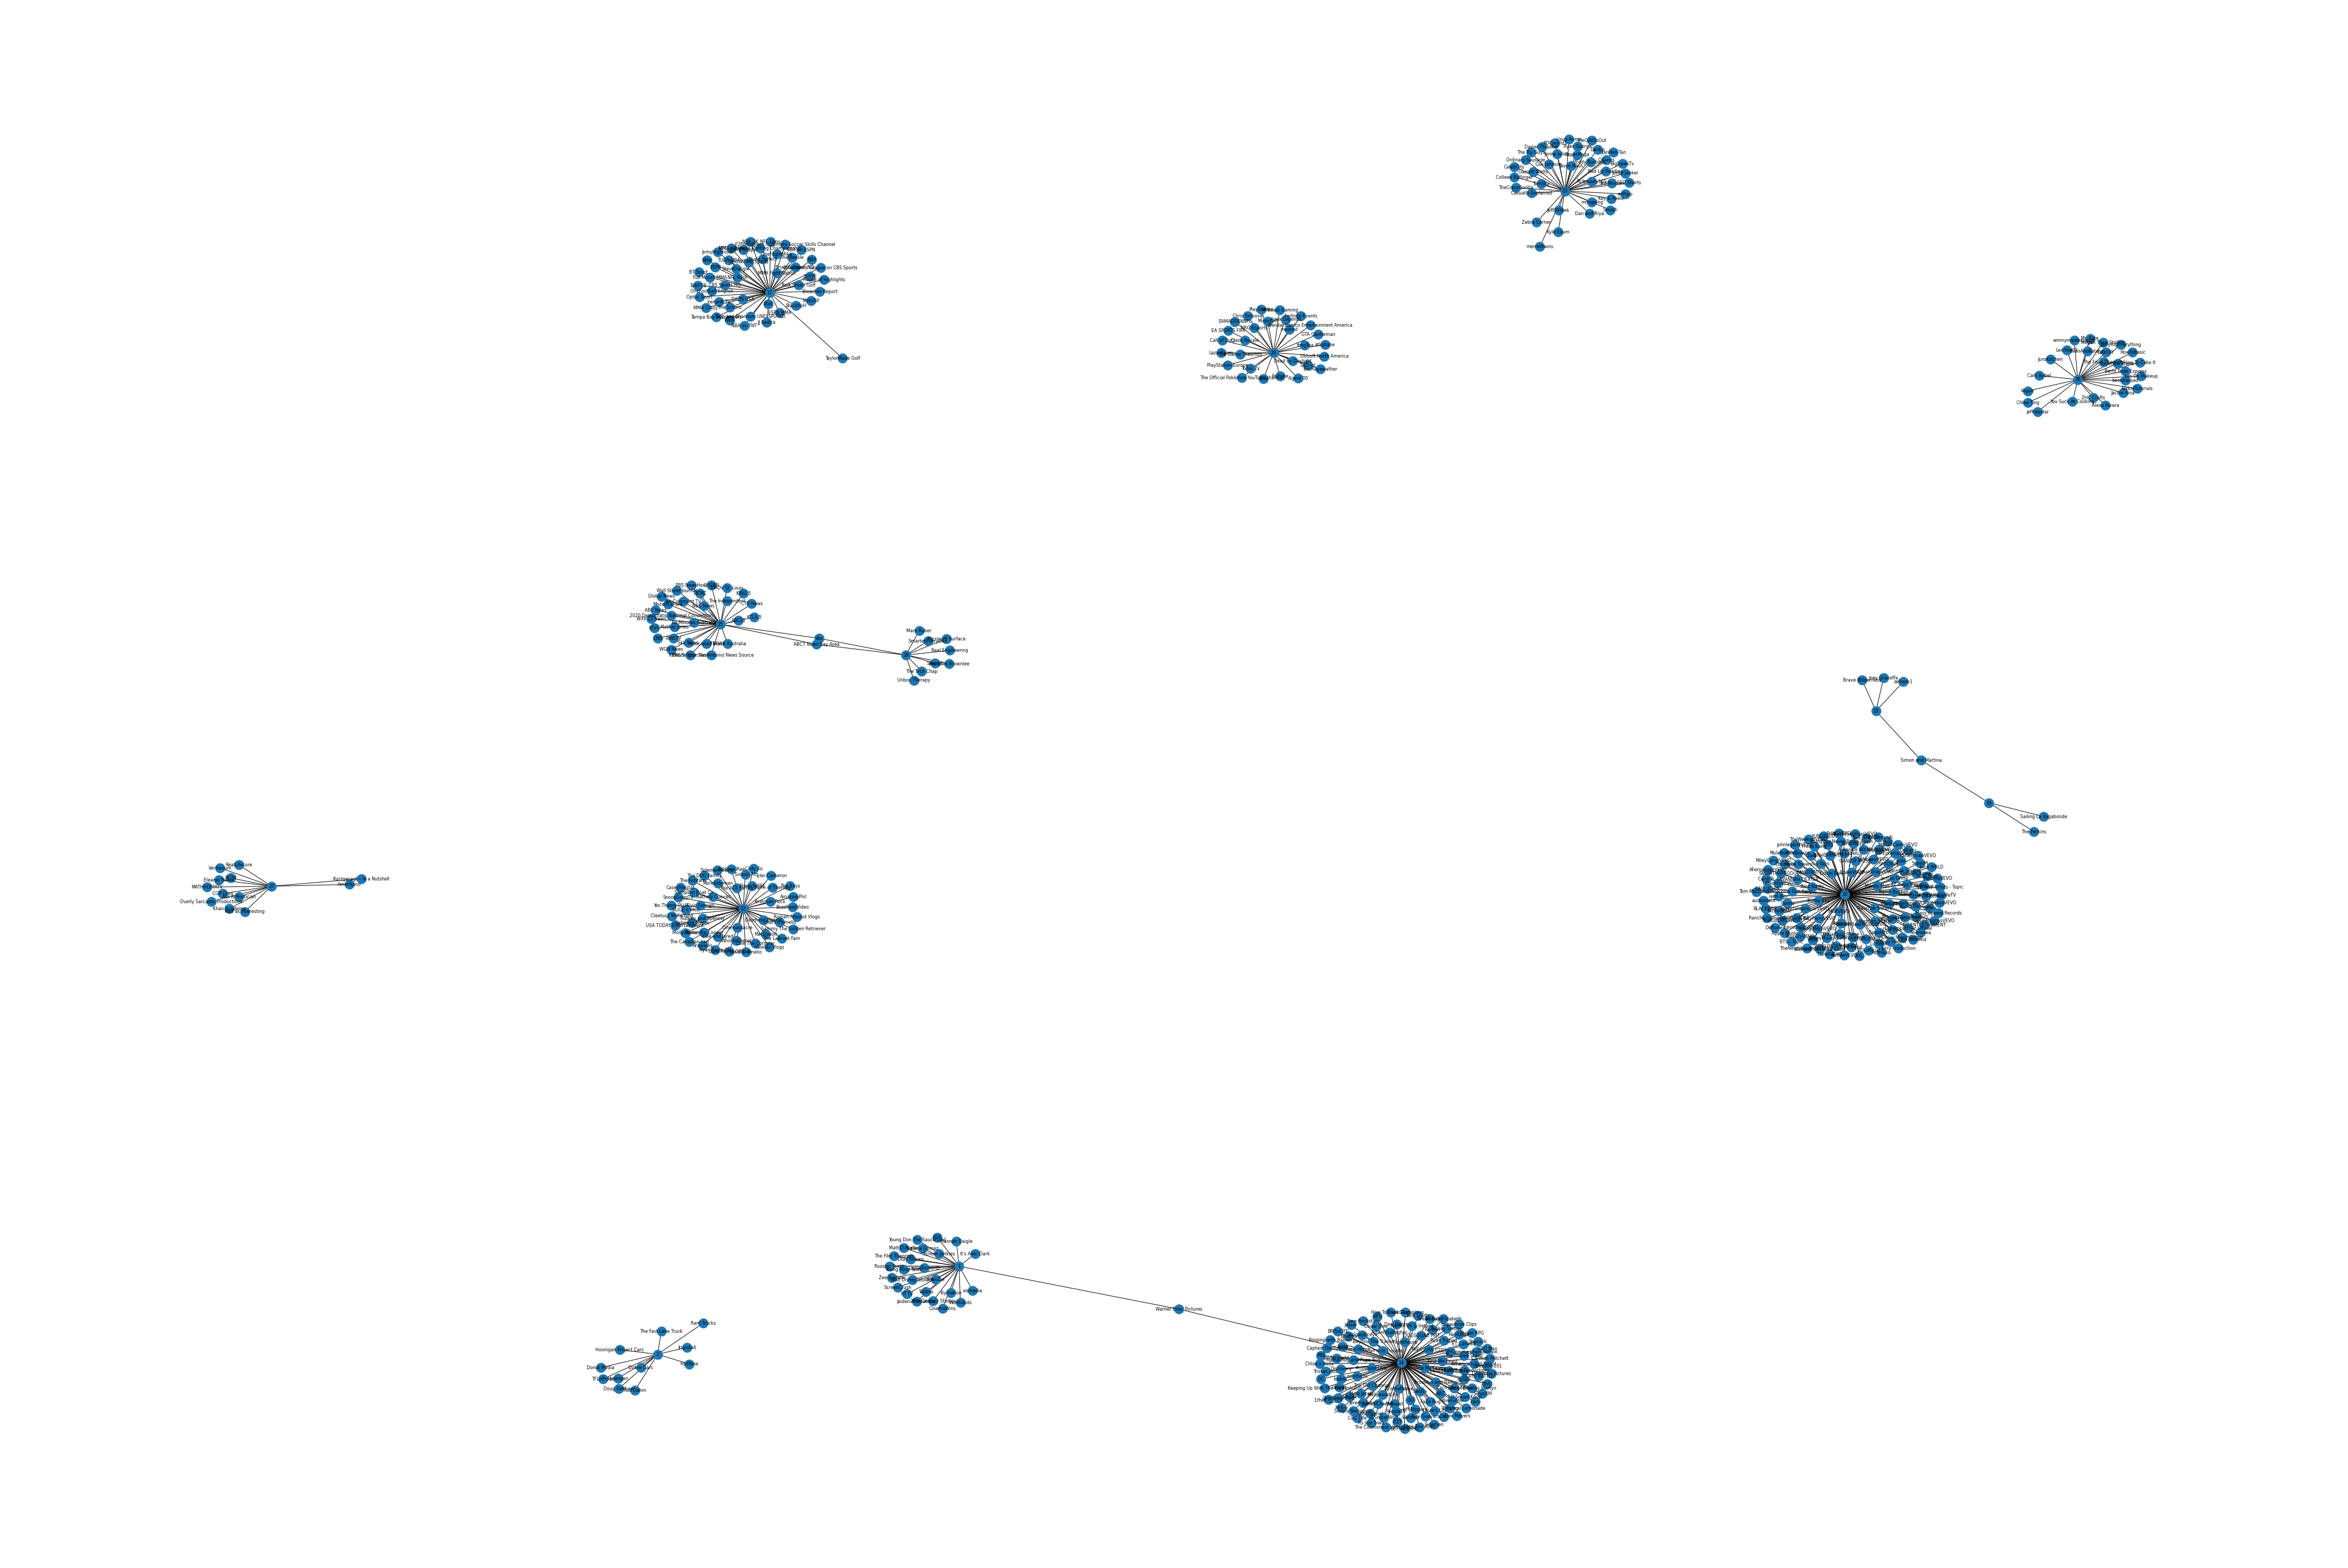

In [ ]:
PlotGraph(graph_us.edges)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text

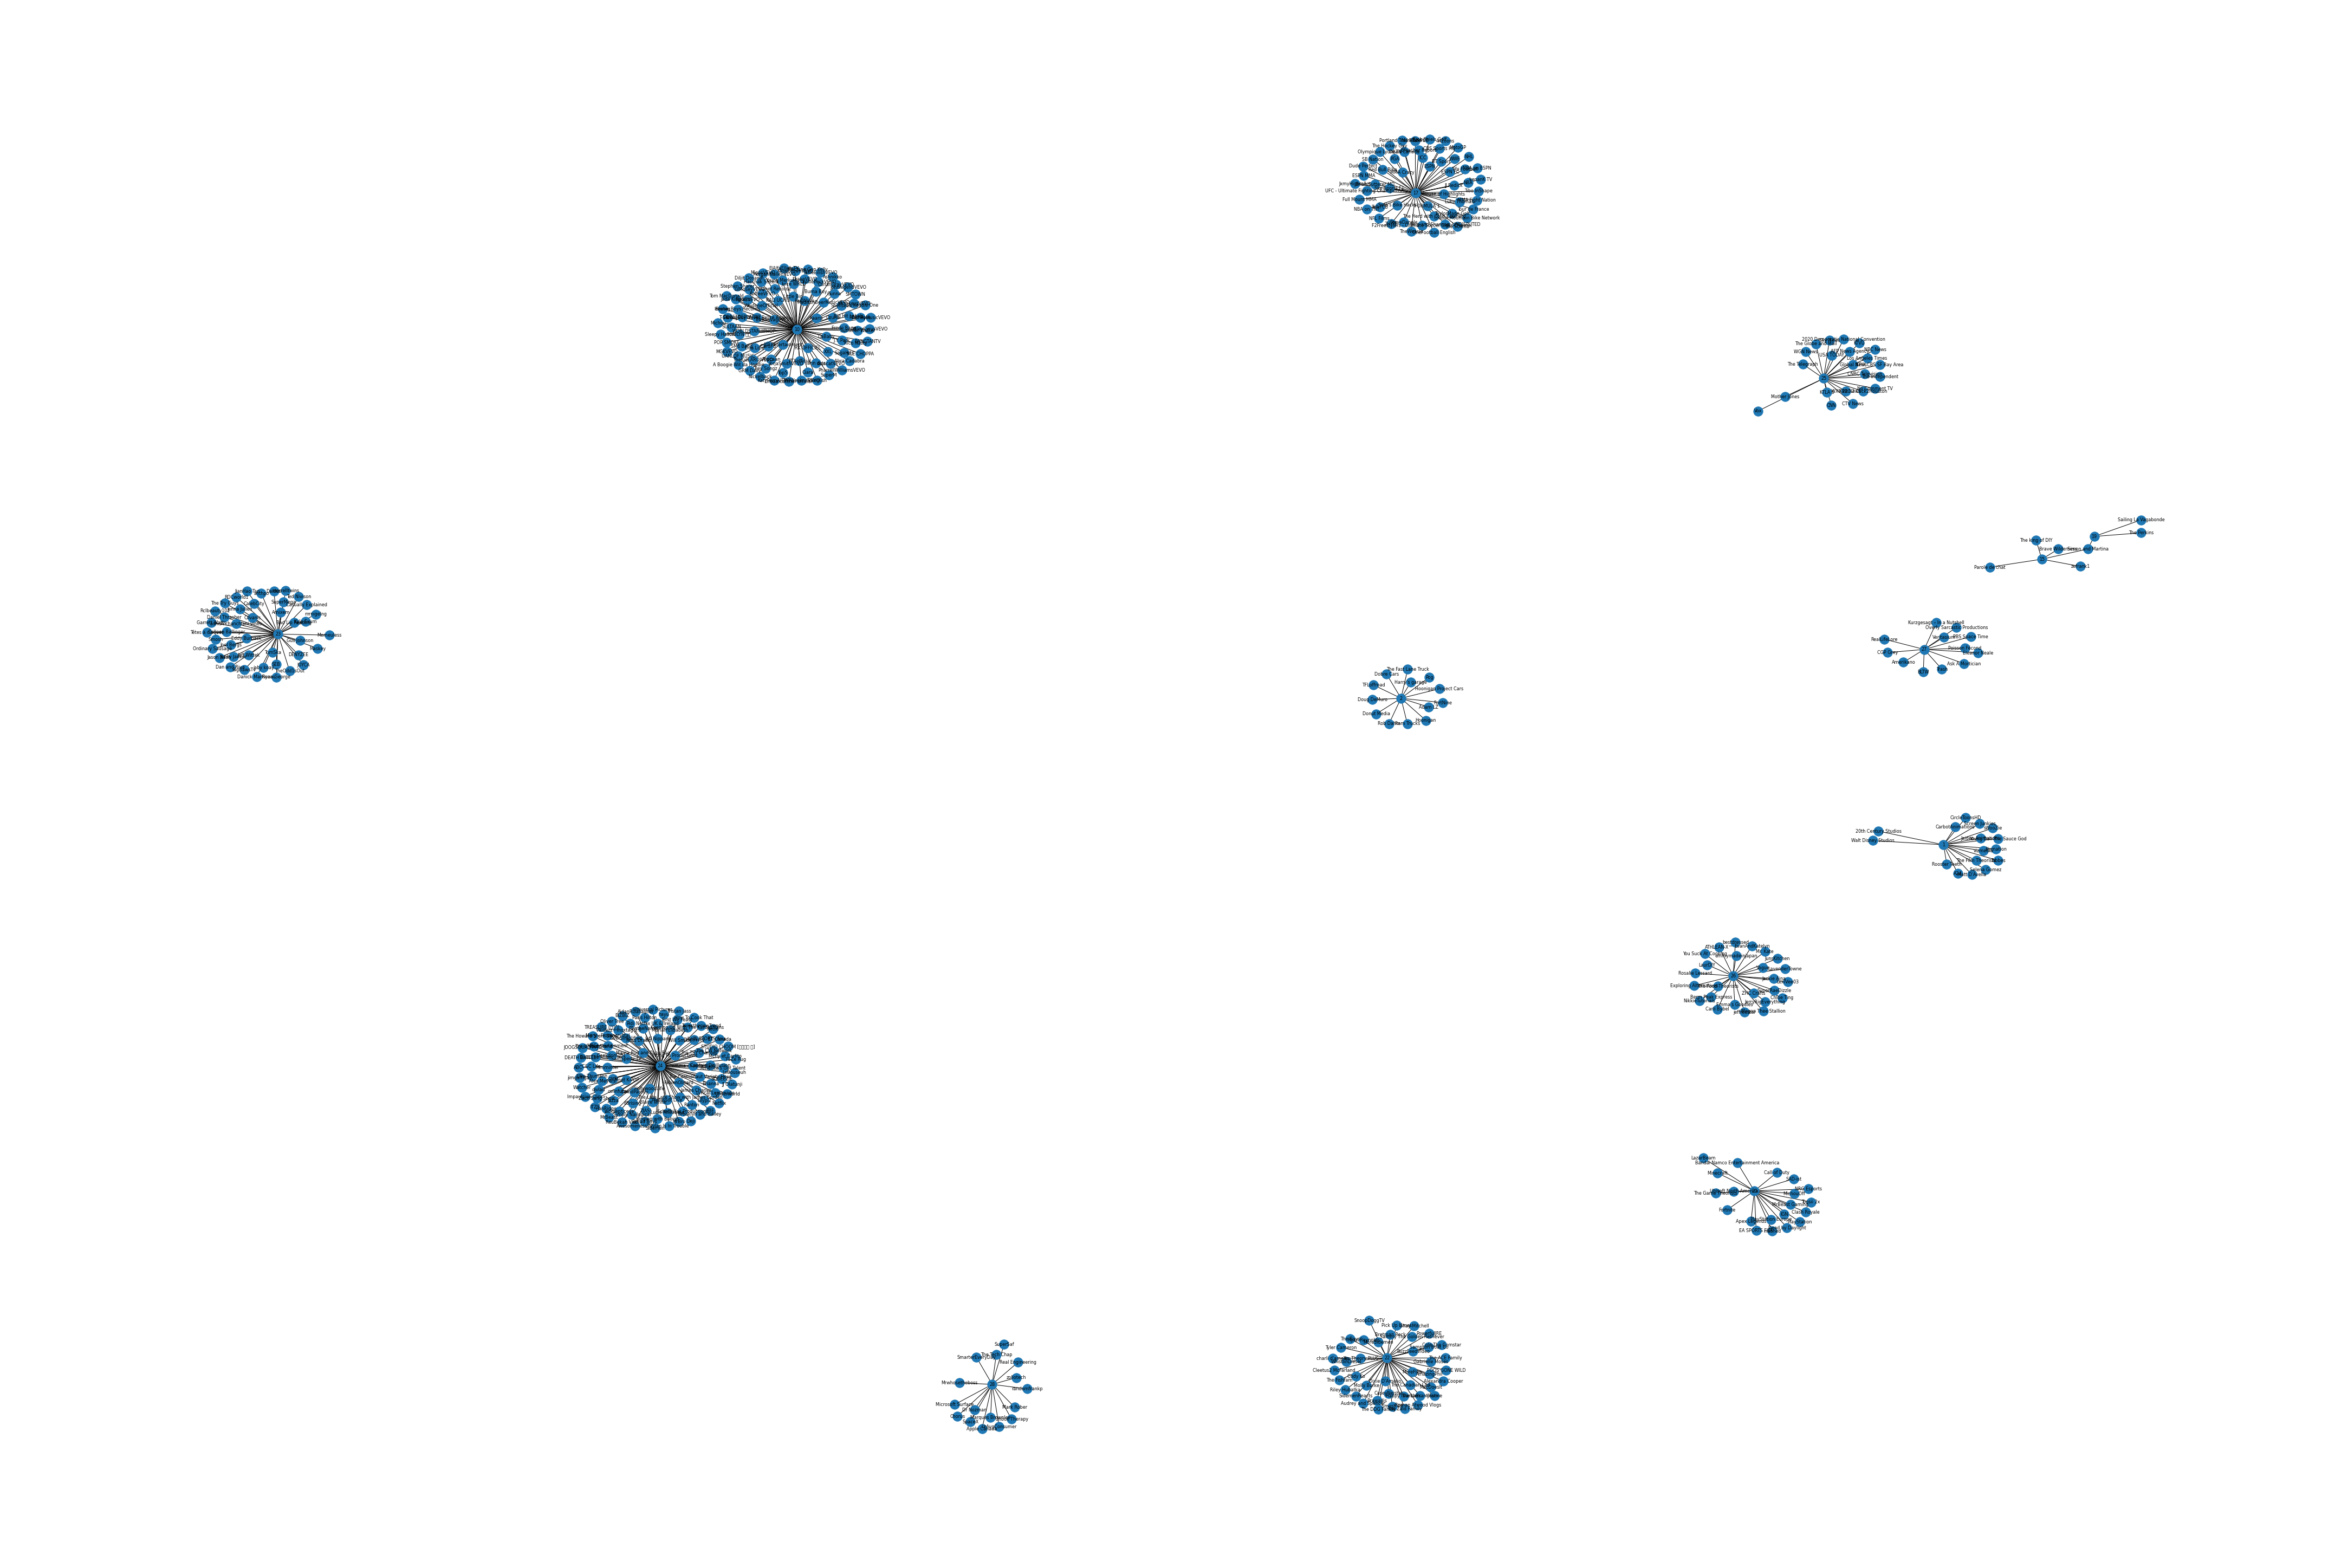

In [ ]:
PlotGraph(graph_ca.edges)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text

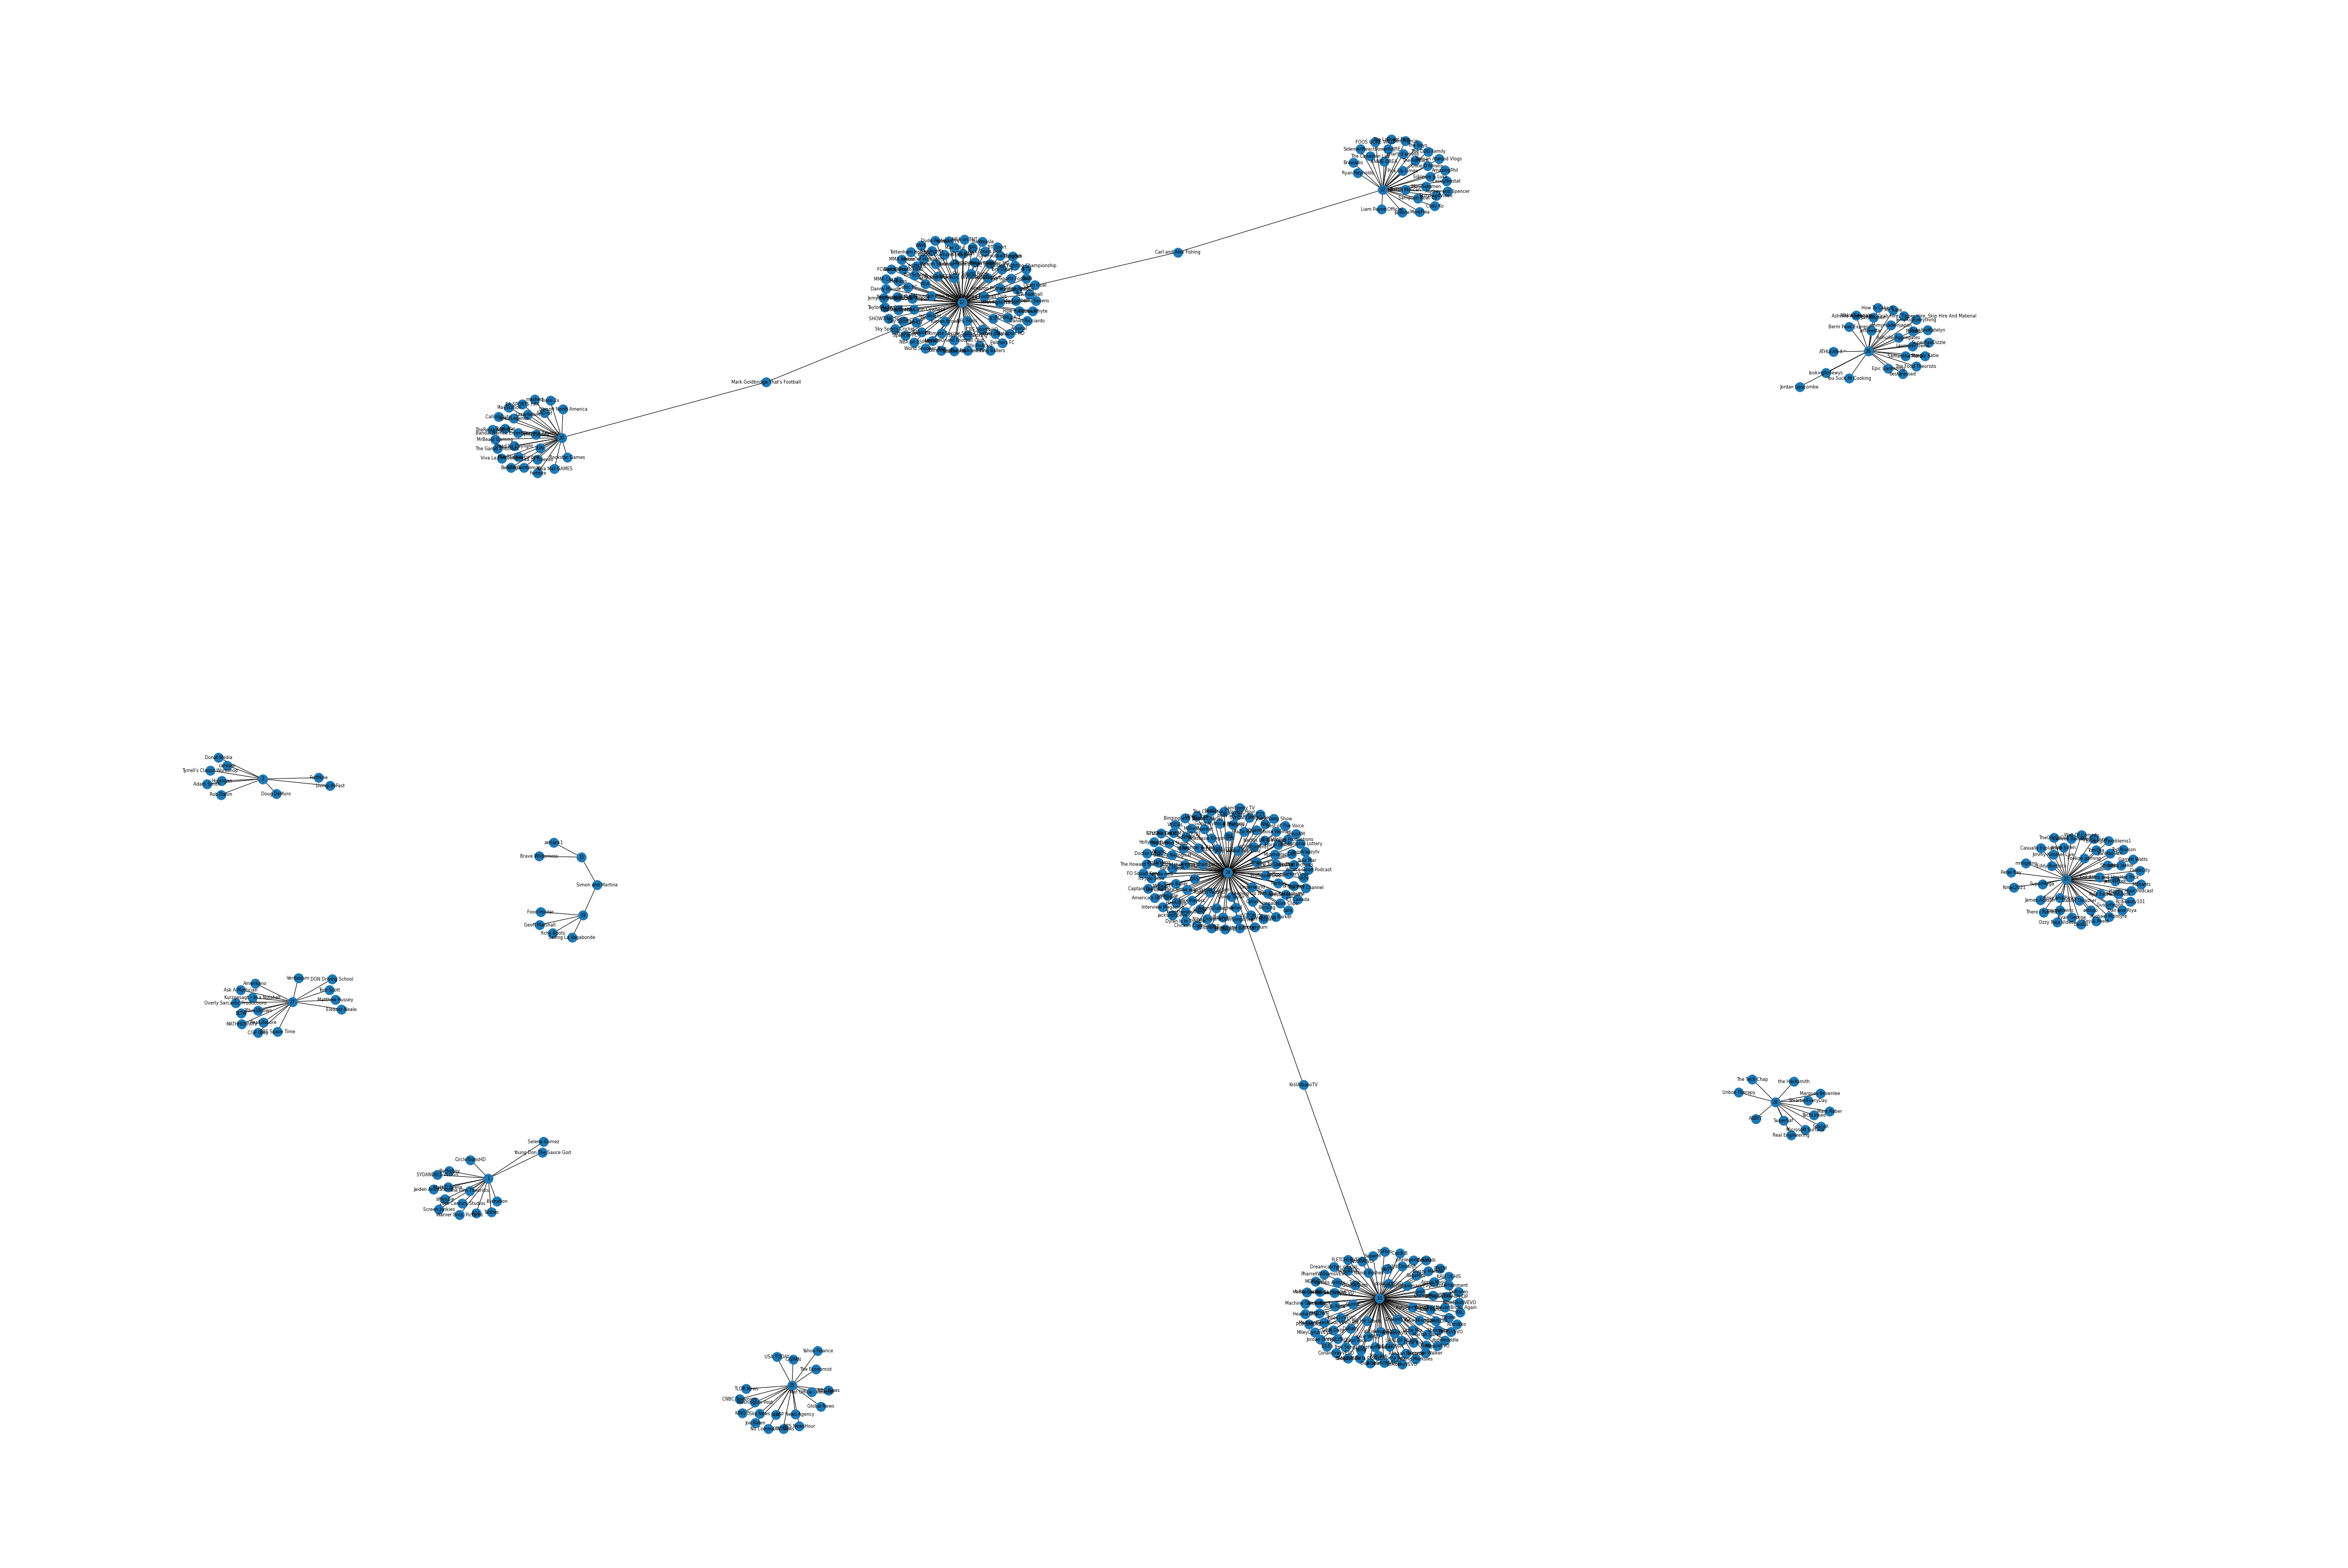

In [ ]:
PlotGraph(graph_gb.edges)

In [ ]:
graph_us.degrees.show()

+--------------------+------+
|                  id|degree|
+--------------------+------+
|     SAVANNAH DEXTER|    55|
|         Jordan Orme|    14|
|  The New York Times|    27|
|        Marcus House|    10|
|           SPORTSNET|    37|
|                 NBC|    66|
|           Lil Nas X|    98|
|Fenty Beauty By R...|     9|
|        Chris Ramsay|    21|
|             By Post|    45|
|       insuperable69|     6|
|         ABC 10 News|    24|
|         Austin Felt|    22|
|      Celaine's ASMR|     6|
|              Helmut|     1|
|            Power DF|     4|
|           itsjusta6|    27|
|        Renee Amberg|     6|
|ZaraLarssonMusicVEVO|     4|
|           R Λ Z Ξ R|     9|
+--------------------+------+
only showing top 20 rows

